In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

In [10]:
lamost = pd.read_csv("../data/gaia-kepler-lamost.csv")  # File created using the LAMOST DR5 website: http://dr5.lamost.org/search

In [11]:
lamost.keys()

Index(['inputobjs_input_id', 'inputobjs_input_ra', 'inputobjs_input_dec',
       'inputobjs_dist', 'catalogue_obsid', 'catalogue_obsdate',
       'catalogue_planid', 'catalogue_spid', 'catalogue_fiberid',
       'catalogue_class', 'catalogue_subclass', 'catalogue_z',
       'catalogue_z_err', 'catalogue_ra', 'catalogue_dec', 'stellar_teff',
       'stellar_teff_err', 'stellar_logg', 'stellar_logg_err', 'stellar_feh',
       'stellar_feh_err', 'stellar_rv', 'stellar_rv_err'],
      dtype='object')

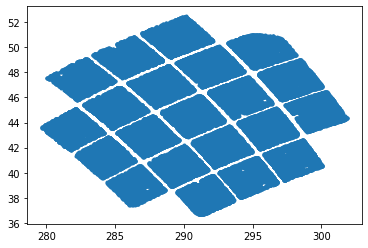

In [12]:
plt.plot(lamost.catalogue_ra, lamost.catalogue_dec, ".")  # LAMOST RA and dec

Merge Gaia and LAMOST catalogs using RA and dec.

In [27]:
# Load Gaia-Kepler crossmatch.
with fits.open("../data/kepler_dr2_1arcsec.fits") as data:
    gaia = pd.DataFrame(data[1].data, dtype="float64")

Round Gaia ra and dec down to 6 decimal places for the Xmatch.

In [48]:
gaia["ra_6dp"] = np.round(gaia.ra.values, 6)
gaia["dec_6dp"] = np.round(gaia.dec.values, 6)

In [60]:
# Add LAMOST
lamost["ra_6dp"] = lamost.inputobjs_input_ra.values
lamost["dec_6dp"] = lamost.inputobjs_input_dec.values
lamost_gaia = pd.merge(gaia, lamost, on=["ra_6dp", "dec_6dp"], how="left", suffixes=["", "_lamost"])
lamost_gaia = lamost_gaia.drop_duplicates(subset="source_id")

In [61]:
print(np.shape(gaia), np.shape(lamost), np.shape(lamost_gaia))

(197090, 103) (123039, 27) (196300, 128)


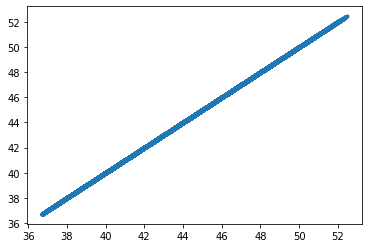

In [62]:
plt.plot(lamost_gaia.dec_6dp, lamost_gaia.catalogue_dec, ".")

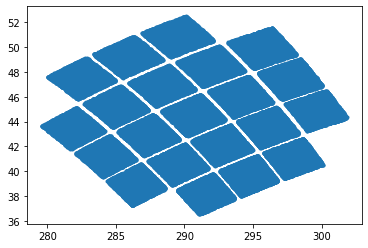

In [63]:
plt.plot(lamost_gaia.ra_6dp, lamost_gaia.dec_6dp, ".")

In [102]:
m = np.isfinite(lamost_gaia.stellar_rv.values)
print(len(lamost_gaia), sum(m))
_m = np.isfinite(lamost_gaia.radial_velocity.values) & (lamost_gaia.radial_velocity.values != 0)
print(sum(_m))

196300 37949
30276


12419


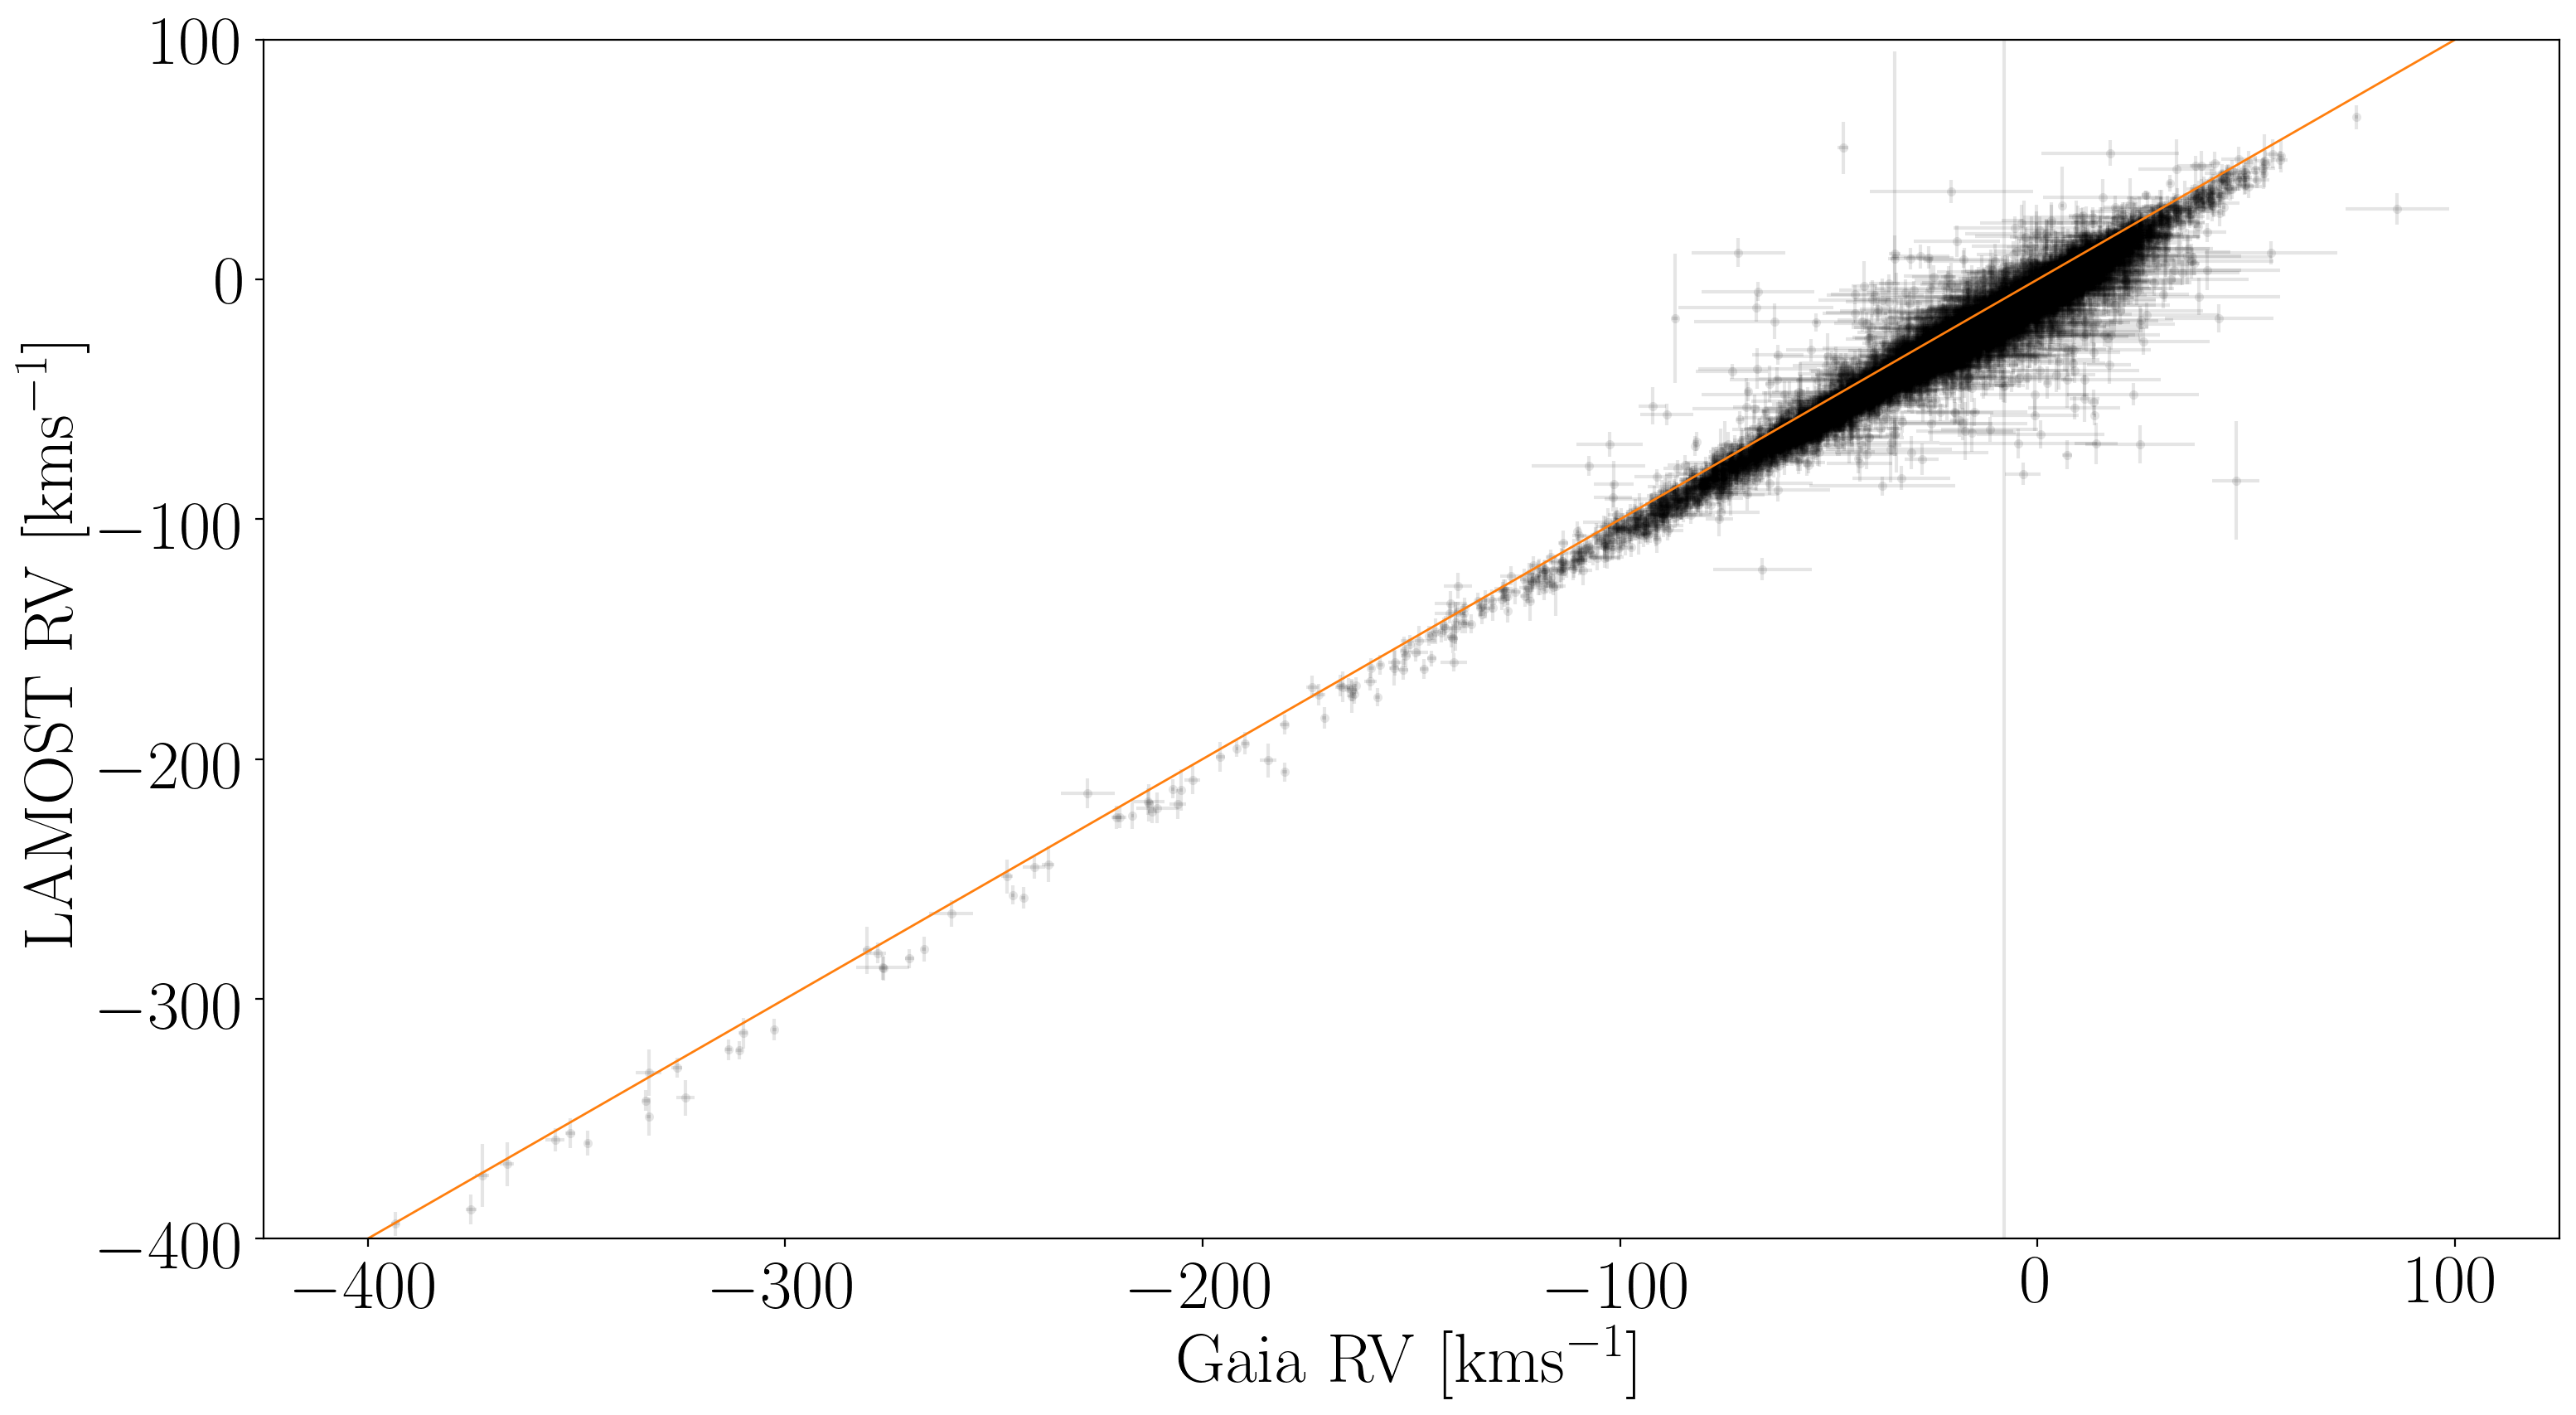

In [104]:
plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

m = np.isfinite(lamost_gaia.stellar_rv.values) & np.isfinite(lamost_gaia.radial_velocity.values) \
    & (lamost_gaia.radial_velocity.values != 0) & (lamost_gaia.stellar_rv_err.values < 100)
print(sum(m))

plt.figure(figsize=(16, 9), dpi=200)
plt.errorbar(lamost_gaia.radial_velocity.values[m], lamost_gaia.stellar_rv.values[m],
             xerr=lamost_gaia.radial_velocity_error.values[m],
             yerr=lamost_gaia.stellar_rv_err.values[m],
             fmt="k.", alpha=.1, ms=8, mec="none", zorder=0, rasterized=True)
xs = np.linspace(-400, 100, 100)
plt.plot(xs, xs, "C1", lw=1, zorder=1)
plt.ylim(-400, 100)
plt.xlabel("$\mathrm{Gaia~RV~[km s^{-1}]}$")
plt.ylabel("$\mathrm{LAMOST~RV~[km s^{-1}]}$")
plt.tight_layout()
plt.savefig("../plots/lamost_gaia_rvs")
plt.savefig("../plots/lamost_gaia_rvs.pdf")

1.0859566917807566 1.2324772126106096


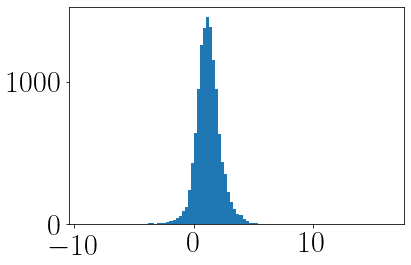

In [95]:
tot_err = np.sqrt(lamost_gaia.radial_velocity_error.values[m]**2 + lamost_gaia.stellar_rv_err.values[m]**2)
resids = lamost_gaia.radial_velocity.values[m] - lamost_gaia.stellar_rv.values[m]
plt.hist(resids/tot_err, 100);
print(np.std(resids/tot_err), np.mean(resids/tot_err))

In [78]:
max(lamost_gaia.stellar_rv_err.values[m])

84.29

In [2]:
df = pd.read_csv("../kepler_kinematics/gaia_kepler.csv")

In [5]:
np.shape(df), len(df.vx.values[np.isfinite(df.vx.values)])

((177763, 132), 35735)

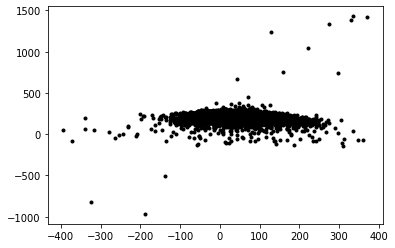

In [3]:
plt.plot(df.vx, df.vy, "k.", rasterized=True)